# Câu Hỏi, Đáp Án và Phân Tích
The Movies Dataset

---

## 0. Môi trường và Dữ Liệu


Tất cả các thư viện môi trường dùng trong đồ án này được liệt kê trong file `environment.yml`.

Trước khi tiến hành phân tích dữ liệu, chúng ta sẽ import các thư viện sau.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

import warnings
warnings.filterwarnings('ignore')

Với dữ liệu sau khi khám phá và xử lý sơ bộ, chúng ta sẽ sử dụng chúng để phân tích và trả lời câu hỏi. Ta vẫn lưu chúng vào DataFrame là `movies`.

In [56]:
movies = pd.read_csv('Data/movies_cleaned.csv')
movies.head(5)

,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30 00:00:00,373554033,81.0,English,Released,UNKNOWN,Toy Story,False,7.7,5415
1,False,UNKNOWN,65000000,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15 00:00:00,262797249,104.0,"English,Français",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,Grumpy Old Men Collection,0,"Romance,Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22 00:00:00,0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,UNKNOWN,16000000,"Comedy,Drama,Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22 00:00:00,81452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,Father of the Bride Collection,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions,Touchstone Pictures",United States of America,1995-02-10 00:00:00,76578911,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


## 1. Đặt câu hỏi

### Câu hỏi 1: Các thể loại phim phản ánh điều gì về thị hiếu khán giả và xu hướng trong ngành công nghiệp điện ảnh?

Để phân tích cho câu hỏi trên, ta sẽ tập trung vào hai khía cạnh về sự phân bố và xu hướng phát hành của các thể loại phim qua từng năm trong ngành công nghiệp điện ảnh.

1. **Khám phá sự phân bố của số lượng phim theo thể loại:**  
   Trước tiên, chúng ta sẽ trả lời câu hỏi: **"Có bao nhiêu phim thuộc từng thể loại, và thể loại nào phổ biến nhất?"**.  
   
   Kết quả phân tích này sẽ giúp ta:  
   - Cung cấp cái nhìn tổng quan về mức độ phổ biến của các dòng phim.  
   - Hỗ trợ nhà sản xuất trong việc nhận diện thị hiếu khán giả để định hướng chiến lược đầu tư.  
   - Giúp người xem biết được các thể loại chiếm ưu thế để dễ dàng lựa chọn dòng phim yêu thích.

2. **Xu hướng của 5 thể loại phổ biến nhất qua các năm:**  
   Tiếp theo, chúng ta sẽ đi sâu phân tích xu hướng phát hành phim của **5 thể loại phổ biến nhất** qua các năm thông qua câu hỏi: **"Trong số các thể loại phổ biến nhất, thể loại nào đang phát triển mạnh mẽ, và thể loại nào có dấu hiệu suy giảm hay không"**?  
   
   Kết quả mong đợi:  
   - Nhận diện được sự tăng trưởng hoặc giảm sút của các thể loại phim thịnh hành qua từng thời kỳ.  
   - Hỗ trợ nhà sản xuất dự đoán các dòng phim tiềm năng để đầu tư.  


### Câu hỏi 2: Mối quan hệ giữa ngân sách và doanh thu của phim như thế nào?

Để trả lời câu hỏi này, chúng ta sẽ thực hiện phần trả lời câu hỏi thành hai phần:

1. **Phân tích mối quan hệ giữa ngân sách và doanh thu:**
   Trước tiên, chúng ta sẽ trả lời câu hỏi: **"Liệu ngân sách của phim có ảnh hưởng đến doanh thu của phim không?"**  
   
   Phân tích này sẽ giúp:
   - Khám phá xem ngân sách lớn có thể dẫn đến doanh thu cao hơn hay không.
   - Cung cấp thông tin giúp các nhà sản xuất dự đoán khả năng sinh lời từ các bộ phim dựa trên mức ngân sách.
   - Hỗ trợ nhà sản xuất quyết định mức ngân sách phù hợp để tối ưu hóa lợi nhuận từ phim.

2. **Khám phá sâu hơn mối quan hệ giữa ngân sách và doanh thu bằng cách phân loại:**
   Tiếp theo, để tìm hiểu kỹ hơn về sự ảnh hưởng của ngân sách đến doanh thu, chúng ta sẽ trả lời câu hỏi: **"Doanh thu trung bình của các bộ phim thuộc các nhóm ngân sách khác nhau là bao nhiêu?"**
   
   Phân tích này sẽ giúp:
   - Tìm hiểu liệu các nhóm ngân sách lớn có doanh thu trung bình cao hơn các nhóm ngân sách nhỏ hay không.
   - Cung cấp thông tin chi tiết để nhà sản xuất có thể tối ưu hóa ngân sách cho các dự án phim, từ đó tối đa hóa lợi nhuận.

## 2. Phân tích và trả lời

### Câu hỏi 1: Các thể loại phim phản ánh điều gì về thị hiếu khán giả và xu hướng trong ngành công nghiệp điện ảnh?

#### 1. Đầu tiên, chúng ta sẽ khám phá **sự phân bố của số lượng phim theo thể loại** bằng cách trả lời câu hỏi: **Có bao nhiêu phim thuộc từng thể loại, và thể loại nào phổ biến nhất?"**.  


Sao chép dataFrame movies vào question01_df cho việc phân tích và chuyển đổi cột `genres` thành list các thể loại, sau đó tách các thể loại ra thành các dòng riêng biệt bằng `explode`.

In [57]:
question01_df = movies.copy()
question01_df['genres'] = question01_df['genres'].apply(lambda x: x.split(',')).explode('genres')

Đếm số lượng phim theo thể loại

In [58]:
genre_counts = question01_df['genres'].value_counts()
genre_counts

genres
Drama              10532
Comedy              6308
Romance             3915
Thriller            3855
Action              3297
Crime               2314
Horror              2017
Adventure           1834
Science Fiction     1410
Documentary         1268
Family              1250
Mystery             1248
Fantasy             1130
Music                868
History              747
Foreign              744
War                  732
Animation            612
Western              512
UNKNOWN              457
TV Movie             139
Name: count, dtype: int64

Vẽ biểu đồ

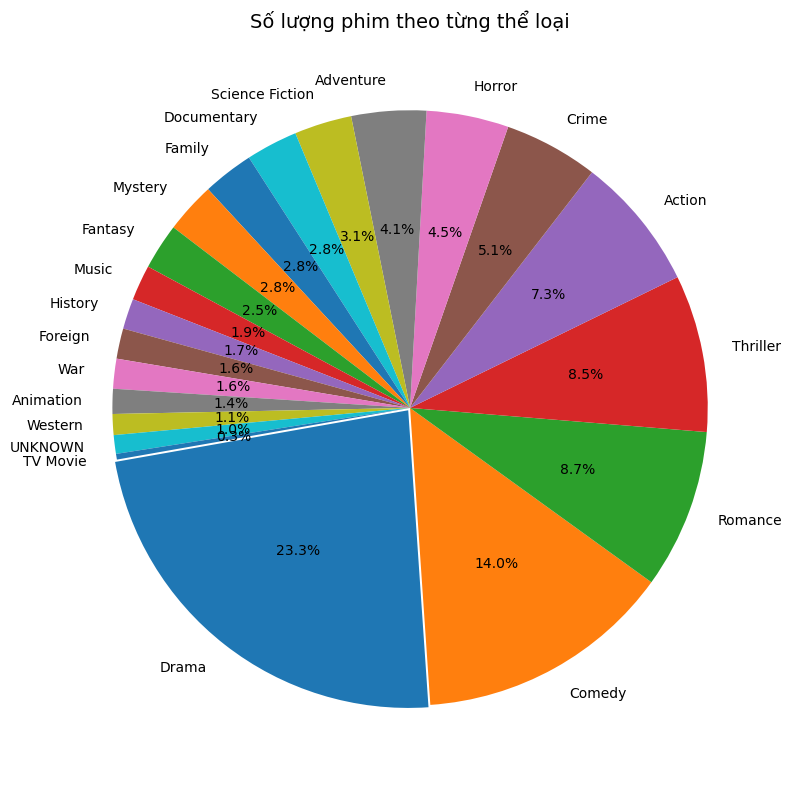

In [59]:
plt.figure(figsize=(10, 8))
explode = [0.01 if count == genre_counts.max() else 0 for count in genre_counts]
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=190, explode=explode, textprops={'fontsize': 10})
plt.title('Số lượng phim theo từng thể loại', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

Như vậy từ biểu đồ trên, ta có được cái nhìn tổng quát về thể loại phim trong thị trường điện ảnh như sau:
 - **Drama** là thể loại phim phổ biến nhất, chiếm tỷ lệ lớn nhất trong tổng số phim, **Comedy** và **Thriller** là hai thể loại phổ biến tiếp theo, với số lượng phim đáng kể.
- Các thể loại như **Romance**, **Action**, và **Horror** cũng có số lượng phim tương đối nhiều.
- Ngược lại các thể loại như **Western**, **TV Movie**, **History**, và **War** có số lượng phim ít nhất, thể hiện đây là những thể loại không phổ biến, không được ưa chuộng bởi phần lớn khán giả và nhà sản xuất.

#### 2. Tiếp theo, để hiểu rõ xu hướng phát hành phim qua các năm của các thể loại trên, ta sẽ trả lời câu hỏi: **Trong số các thể loại phổ biến nhất, thể loại nào đang phát triển mạnh mẽ, và liệu có thể loại nào có dấu hiệu suy giảm không?**

Để thực hiện phân tích xu hướng phát hành phim theo thời gian của 5 thể loại phổ biến nhất, ta sẽ thực hiện các bước sau:

1. Tìm các top 5 thể loại phổ biến nhất bằng cách chọn ra 5 thể loại có số lượng phim nhiều nhất từ `genre_counts`.

In [60]:
top_5_genres = genre_counts.head(5).index.tolist()
top_5_genres_df = question01_df[question01_df['genres'].isin(top_5_genres)]

 2. Sử dụng cột `release_date` để tính toán số lượng phim phát hành theo từng năm cho mỗi thể loại.

In [61]:
top_5_genres_df['release_date'] = pd.to_datetime(top_5_genres_df['release_date'],  errors='coerce')
top_5_genres_df['year'] = top_5_genres_df['release_date'].dt.year

# Tính toán số lượng phim phát hành theo từng năm cho mỗi thể loại
genre_year_counts = top_5_genres_df.groupby(['year', 'genres']).size().unstack().fillna(0)

3. Vẽ biểu đồ thể hiện xu hướng phát hành phim theo thời gian của các thể loại này

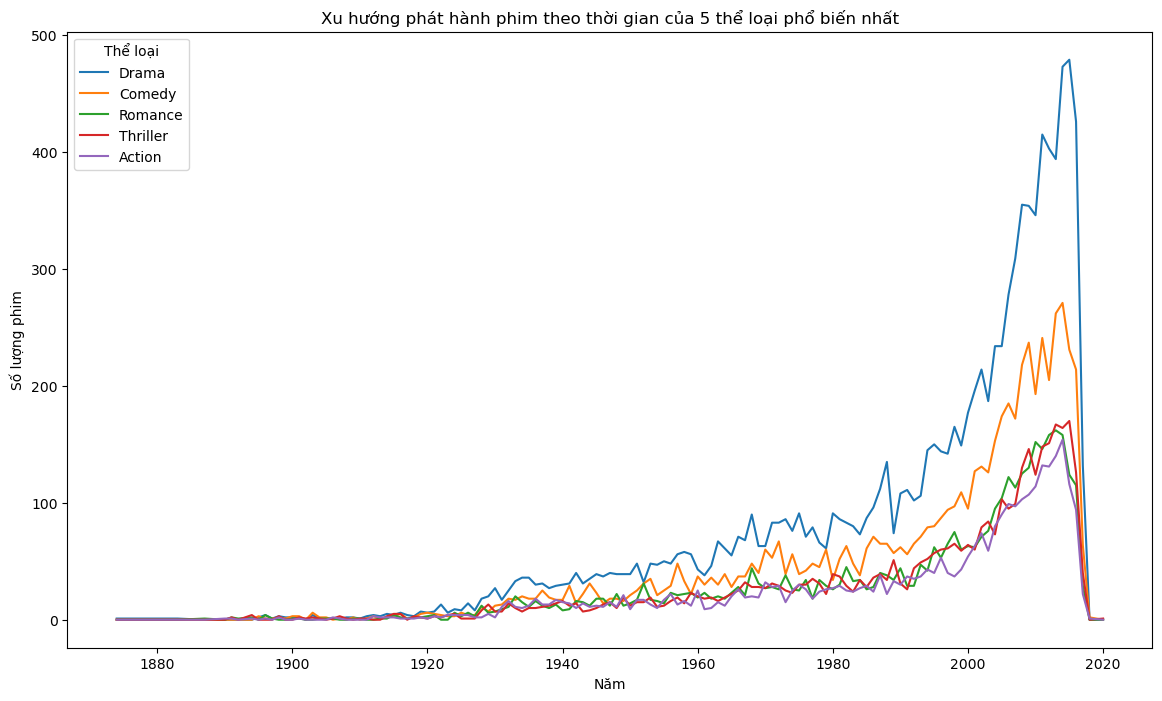

In [ ]:
plt.figure(figsize=(14, 8))
for genre in top_5_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)

plt.title('Xu hướng phát hành phim theo thời gian của 5 thể loại phổ biến nhất')
plt.xlabel('Năm')
plt.ylabel('Số lượng phim')
plt.legend(title='Thể loại')
plt.show()

Như vậy từ các quan sát từ các biểu đồ trên, chúng ta có thể rút ra một số nhận xét sau:
- **Drama** là thể loại phim phổ biến nhất, chiếm tỷ lệ lớn nhất trong tổng số phim, **Comedy** và **Thriller** là hai thể loại phổ biến tiếp theo, với số lượng phim đáng kể.
- Các thể loại như **Romance**, **Action**, và **Horror** cũng có số lượng phim tương đối nhiều.
- Ngược lại các thể loại như **Western**, **TV Movie**, **History**, và **War** có số lượng phim ít nhất, thể hiện đây là những thể loại không phổ biến, không được ưa chuộng bởi phần lớn khán giả và nhà sản xuất.
- Thể loại phim **Drama** luôn duy trì vị trí dẫn đầu về số lượng phim phát hành qua các năm thể hiện rõ đây luôn là thể loại phim "ăn khách" và thu hút đông đảo khán giả nhất.
- **Comedy** duy trì xu hướng phát hành ổn định và ghi nhận sự tăng trưởng đều đặn qua các năm, thể hiện sự yêu thích lâu dài của khán giả đối với thể loại mang tính giải trí cao này.
- **Thriller** nổi bật với tốc độ phát triển nhanh chóng, đặc biệt từ sau năm 2000, khi dòng phim này vượt qua **Romance** và **Action** về số lượng sản xuất, cho thấy sự thay đổi rõ rệt trong thị hiếu khán giả đối với những câu chuyện kịch tính, lôi cuốn.  
- **Romance** và **Action** dù trải qua nhiều biến động vẫn giữ được vị thế quan trọng với lượng phim phát hành đáng kể. Tuy nhiên, **Romance** đang có xu hướng suy giảm sức hút, đặc biệt khi so sánh với giai đoạn 1930-1940, thời điểm mà thể loại này từng chiếm ưu thế vượt trội nhưng hiện tại không còn giữ được vị trí như trước. 
- Nhìn chung các thể loại phim đều có xu hướng tăng trưởng qua các năm, đặc biệt là từ năm 2000 trở về sau với sự bùng nổ của số lượng phim cho thấy sự phát triển nhanh chóng của ngành công nghiệp điện ảnh.

Từ đó, chúng ta có thể rút ra được một số thông tin hữu ích cho các đối tượng sau:
- **Nhà sản xuất:**
    - Nên tập trung đầu tư vào các thể loại phim phổ biến như **Drama**, **Comedy**, và **Thriller** để đáp ứng nhu cầu thị trường.
    - Có thể xem xét đầu tư vào các thể loại như **Romance** và **Action** do vẫn có lượng khán giả nhất định và tiềm năng phát triển.
    - Các thể loại ít phổ biến như **Western**, **TV Movie**, **History**, và **War** có thể không phải là lựa chọn ưu tiên nếu mục tiêu là tối ưu hóa lợi nhuận.
- **Người xem:**
    - Có thể dễ dàng tìm thấy các bộ phim thuộc thể loại **Drama**, **Comedy**, và **Thriller** do sự phổ biến và số lượng lớn.
    - Nếu yêu thích các thể loại như **Romance** và **Action**, người xem vẫn có nhiều lựa chọn nhưng có thể ít hơn so với các thể loại phổ biến nhất.
    - Các thể loại ít phổ biến như **Western**, **TV Movie**, **History**, và **War** có thể khó tìm hơn nhưng vẫn có những bộ phim chất lượng đáng xem

### Câu hỏi 2: Mối quan hệ giữa ngân sách, thời lượng của phim và doanh thu của phim như thế nào?

#### 1. Trước tiên, chúng ta sẽ trả lời câu hỏi: **"Liệu ngân sách của phim có ảnh hưởng đến doanh thu của phim không?"**  

Sao chép dataFrame movies vào question02_df cho việc phân tích và loại bỏ các phim không có thông tin về ngân sách hoặc doanh thu

In [65]:
question02_df = movies.copy()
question02_df = question02_df[(question02_df['budget'] > 0) & (question02_df['revenue'] > 0)]

Vẽ biểu đồ scatter plot để thấy được mối liên hệ giữa ngân sách và doanh thu

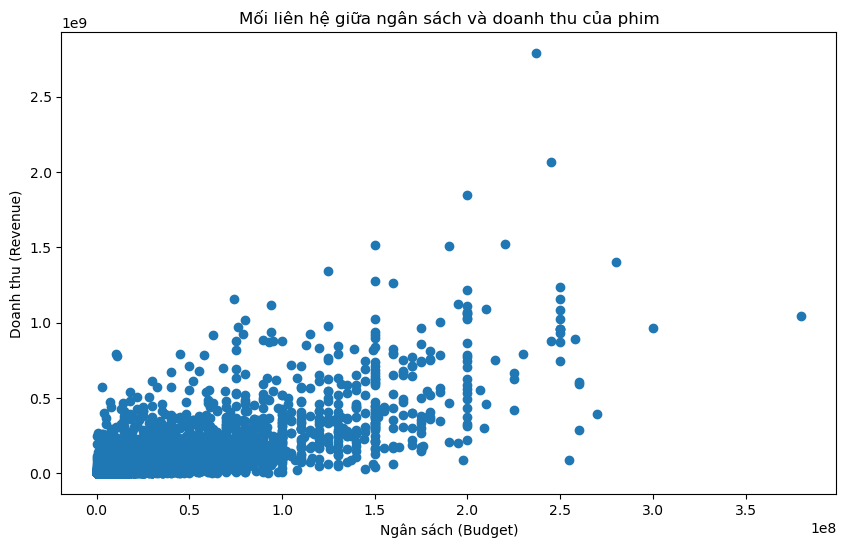

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(question02_df['budget'], question02_df['revenue'], alpha=1)
plt.title('Mối liên hệ giữa ngân sách và doanh thu của phim')
plt.xlabel('Ngân sách (Budget)')
plt.ylabel('Doanh thu (Revenue)')
plt.show()

Dựa vào biểu đồ trên:

- Nhìn chung, ta có thể thấy rõ có một mối tương quan dương giữa ngân sách và doanh thu, nghĩa là các bộ phim có ngân sách lớn hơn thường có xu hướng đạt được doanh thu cao hơn.

- Nhưng sự phân tán của các điểm dữ liệu là khá lớn, thể hiện rằng không phải tất cả các bộ phim có ngân sách lớn đều đạt được doanh thu cao. Có nhiều bộ phim với ngân sách lớn nhưng doanh thu lại thấp, và ngược lại có những bộ phim với ngân sách nhỏ nhưng lại đạt được doanh thu ấn tượng. Điều này có thể do nhiều yếu tố khác nhau như chất lượng kịch bản, đạo diễn, diễn xuất, thời điểm phát hành, và sự cạnh tranh từ các bộ phim khác.

#### 2. Tiếp theo, để tìm hiểu kỹ hơn về sự ảnh hưởng của ngân sách đến doanh thu, chúng ta sẽ phân các mức ngân sách thành các nhóm, từ đó trả lời câu hỏi: **"Doanh thu trung bình của các bộ phim đối với các nhóm ngân sách khác nhau là bao nhiêu?"**

Để thực hiện yêu cầu này, ta sẽ thực hiện các bước sau:
-  Phân loại các bộ phim vào các nhóm ngân sách ("Thấp", "Trung bình", "Cao").
-  Tính toán doanh thu trung bình của từng nhóm ngân sách.
-  Vẽ biểu đồ cột với các nhóm ngân sách trên trục hoành và doanh thu trung bình trên trục tung.

 Phân loại ngân sách thành 3 nhóm

In [67]:
min_budget = question02_df['budget'].min()
max_budget = question02_df['budget'].max()

num_groups = 3
bin_edges = np.linspace(min_budget, max_budget, num_groups + 1)
labels = ['Thấp', 'Trung bình', 'Cao']
question02_df['budget_category'] = pd.cut(question02_df['budget'], bins=bin_edges, labels=labels)
question02_df['budget_category'].value_counts()

budget_category
Thấp          5139
Trung bình     223
Cao              9
Name: count, dtype: int64

Tính doanh thu trung bình trên các nhóm ngân sách

In [68]:
question02_df['revenue'] = question02_df['revenue'] / 1e8
average_revenue_per_budget = question02_df.groupby('budget_category')['revenue'].mean()

Vẽ biểu đồ cho doanh thu trung bình của từng nhóm ngân sách

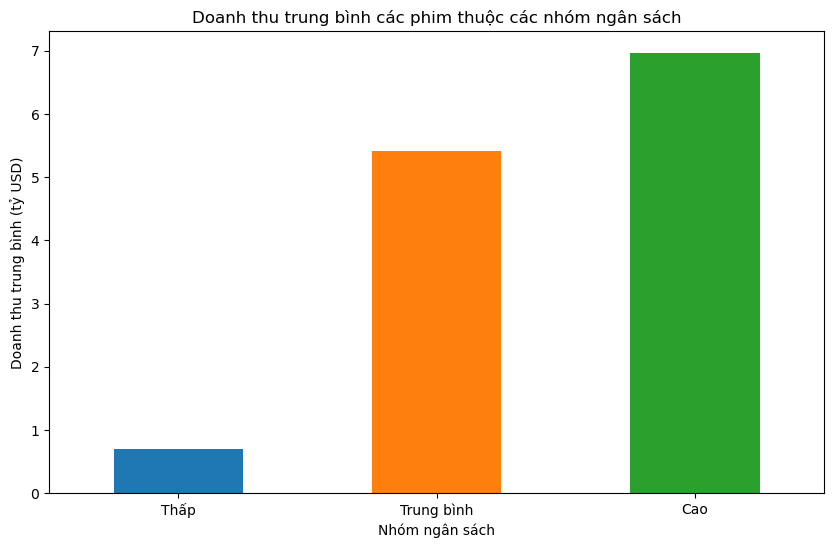

In [ ]:
plt.figure(figsize=(10, 6))
average_revenue_per_budget.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.5)
plt.title('Doanh thu trung bình các phim thuộc các nhóm ngân sách')
plt.xlabel('Nhóm ngân sách')
plt.ylabel('Doanh thu trung bình (tỷ USD)')
plt.xticks(rotation=0)
plt.show()

Như vậy, sau khi xem xét hai phần câu hỏi, ta rút ra được một số kết luận quan trọng về mối quan hệ giữa ngân sách và doanh thu như sau:
- Các bộ phim có **ngân sách cao thường đạt doanh thu cao hơn**.
- Điều này có thể được giải thích bởi việc các bộ phim có ngân sách lớn thường được đầu tư nhiều hơn vào các yếu tố như kỹ xảo, mời được sự góp mặt của các diễn viên nổi tiếng, chi phí quảng cáo, và phân phối, từ đó có thể thu hút, tiếp cận được nhiều khán giả hơn.
- Như vậy các nhà sản xuất nếu muốn thu về lợi nhuận cao cho các bộ phim của mình có thể cân nhắc đầu tư vào ngân sách sản xuất cao hơn.
- Tuy nhiên, không phải tất cả bộ phim có ngân sách lớn đều thành công, các nhà sản xuất nên cân nhắc thêm vào các yếu tố khác như kịch bản phim, đạo diễn, và sự sáng tạo cũng đóng vai trò quan trọng.